In [10]:
import matplotlib.pyplot as plt
import numpy as np
import aubio

In [11]:
filename='avmA.wav'
downsample = 1
samplerate = 0
win_s = 1764 // downsample 
hop_s = 441 // downsample 
s = aubio.source(filename, samplerate, hop_s)
samplerate = s.samplerate
tolerance = 0.1

In [12]:
pitch_o = aubio.pitch("yin", win_s, hop_s, samplerate) 

pitch_o.set_tolerance(tolerance)

pitchesYIN = []
confidences = [] 
total_frames = 0
while True:
    samples, read = s()
    pitch = pitch_o(samples)[0]
    pitch = int(round(pitch))
    confidence = pitch_o.get_confidence()
    pitchesYIN += [pitch]
    confidences += [confidence]
    total_frames += read
    if read < hop_s:
         break

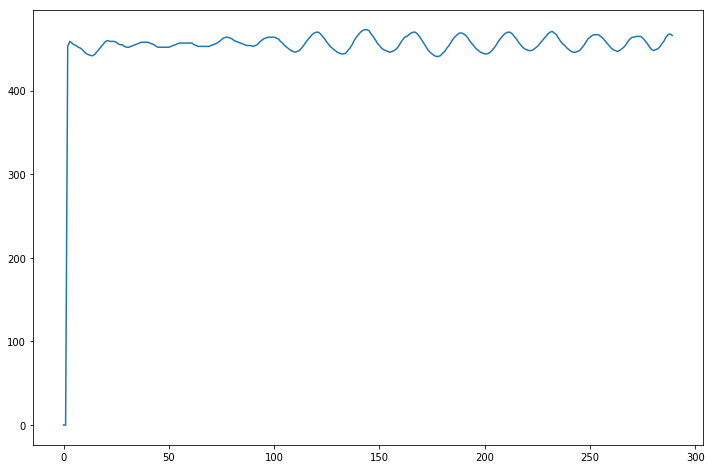

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(1,1,1)    
plt.plot(np.asarray(pitchesYIN))

In [112]:
def yinvaluesfunction(filename, downsample, samplerate, tolerance):
    win_s = 1764 // downsample 
    hop_s = 441 // downsample 
    s = aubio.source(filename, samplerate, hop_s)
    samplerate = s.samplerate
    tolerance = 0.1
    
    pitch_o = aubio.pitch("yin", win_s, hop_s, samplerate) 
    pitch_o.set_tolerance(tolerance)

    pitchesYIN = []
    confidences = [] 
    total_frames = 0
    while True:
        samples, read = s()
        pitch = pitch_o(samples)[0]
        pitch = int(round(pitch))
        confidence = pitch_o.get_confidence()
        pitchesYIN += [pitch]
        confidences += [confidence]
        total_frames += read
        if read < hop_s:
             break
    return pitchesYIN
    

In [113]:
A = yinvaluesfunction(filename = 'avmA.wav', downsample = 1, samplerate = 44100, tolerance = 0.1)

In [114]:
Ve = yinvaluesfunction(filename = 'avmVe.wav', downsample = 1, samplerate = 44100, tolerance = 0.1)
Ma = yinvaluesfunction(filename = 'avmMa.wav', downsample = 1, samplerate = 44100, tolerance = 0.1)
Ri = yinvaluesfunction(filename = 'avmRi1.wav', downsample = 1, samplerate = 44100, tolerance = 0.1)
I = yinvaluesfunction(filename = 'avmI.wav', downsample = 1, samplerate = 44100, tolerance = 0.1)
A2 = yinvaluesfunction(filename = 'avmA2 (1).wav', downsample = 1, samplerate = 44100, tolerance = 0.1)

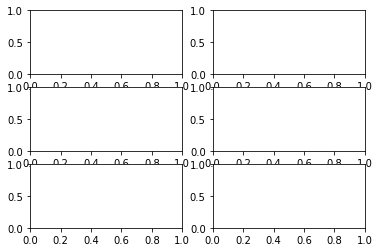

In [101]:
plt.figure
plt.subplot(3,2,1)
plt.subplot(3,2,2)
plt.subplot(3,2,3)
plt.subplot(3,2,4)
plt.subplot(3,2,5)
plt.subplot(3,2,6)

In [107]:
def subplotfunction(subplotnumb, vectorvalues, title, ylabel, xlabel, ylimitvalues):
    plt.subplot(2,3,subplotnumb)    
    plt.plot(np.asarray(vectorvalues))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.ylim(ylimitvalues)

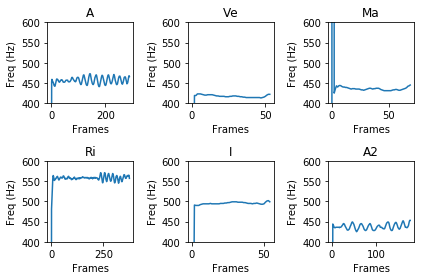

In [117]:
plt.figure
subplotfunction(subplotnumb = 1, vectorvalues = A, title = 'A', ylabel = 'Freq (Hz)', xlabel = 'Frames', ylimitvalues = (400,600))
subplotfunction(subplotnumb = 2, vectorvalues = Ve, title = 'Ve', ylabel = 'Freq (Hz)', xlabel = 'Frames', ylimitvalues = (400,600))
subplotfunction(subplotnumb = 3, vectorvalues = Ma, title = 'Ma', ylabel = 'Freq (Hz)', xlabel = 'Frames', ylimitvalues = (400,600))
subplotfunction(subplotnumb = 4, vectorvalues = Ri, title = 'Ri', ylabel = 'Freq (Hz)', xlabel = 'Frames', ylimitvalues = (400,600))
subplotfunction(subplotnumb = 5, vectorvalues = I, title = 'I', ylabel = 'Freq (Hz)', xlabel = 'Frames', ylimitvalues = (400,600))
subplotfunction(subplotnumb = 6, vectorvalues = A2, title = 'A2', ylabel = 'Freq (Hz)', xlabel = 'Frames', ylimitvalues = (400,600))
plt.tight_layout()